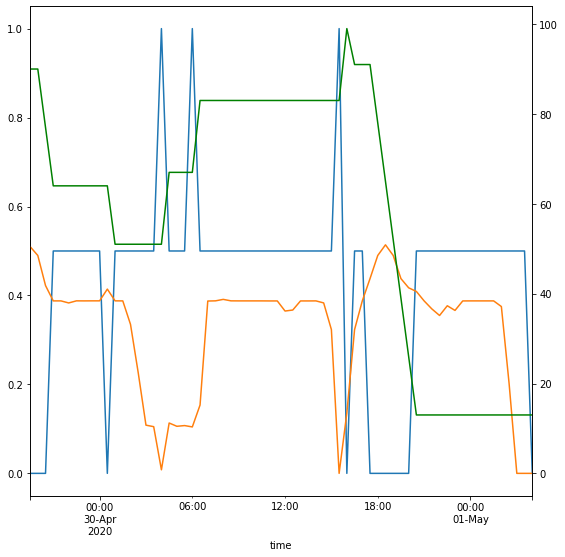

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import matplotlib.dates as mdates
import pandas as pd
from model import Model
from appliance import Appliance

## OK so ramps have to be whole numbers
app = Appliance(max_load=100, maintain_load=10, max_level=100, min_level=70, ramp_up=5, ramp_down=4)

#start percentage has to be between max and min
model = Model(start_percentage=90, n=100, app=app)

model.run_model()

cheapest_path_node = model.get_cheapest_path()
timesteps = model.time_steps



df = pd.DataFrame({'time': timesteps,
                   'onoffpath': cheapest_path_node.path,
                   'state': cheapest_path_node.state_value})
df1 = model.forecast_price
df.set_index('time', inplace=True)
plt.figure(figsize=(9,9))
# df.onoffpath.plot()
# df.forecast.plot(style='r')
df.onoffpath.plot()
df1.RRP.plot(secondary_y=True)
df.state.plot(secondary_y=True, style='g')